In [33]:
%load_ext autoreload
%autoreload 2

# Import thư viện
import sys
sys.path.append('../src')

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# Tải features đã chuẩn hóa (chuẩn bị cho clustering)
scaled_path = '../data/processed/customer_features_scaled.csv'
original_path = '../data/processed/customer_features.csv'

# Khởi tạo cluster analyzer và tải dữ liệu
analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

print("Số khách hàng:", df_scaled.shape[0])
print("Số features:", df_scaled.shape[1])
print("\n5 dòng đầu tiên của dữ liệu đã chuẩn hóa:")
df_scaled.head()

Số khách hàng: 3921
Số features: 16
Số khách hàng: 3921
Số features: 16

5 dòng đầu tiên của dữ liệu đã chuẩn hóa:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836


In [35]:
# Kiểm tra thống kê cơ bản
print("Thống kê mô tả dữ liệu đã chuẩn hóa:")
df_scaled.describe().round(2)

Thống kê mô tả dữ liệu đã chuẩn hóa:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.90,-5.07,-2.99,-5.04,-1.16,-2.30,-1.02,-2.31,-5.07,-4.20,-3.04,-6.00,-5.14,-2.99,-3.00,-3.17
25%,-0.66,-0.55,-0.48,-0.65,-1.16,-0.70,-1.02,-0.65,-0.56,-0.58,-0.42,-0.60,-0.55,-0.57,-0.50,-0.45
50%,-0.03,0.04,0.08,0.00,-0.20,-0.00,-0.23,0.02,0.05,0.03,0.02,0.07,0.06,0.07,0.10,0.02
75%,0.67,0.59,0.48,0.69,0.89,0.70,0.81,0.64,0.57,0.62,0.48,0.58,0.58,0.56,0.47,0.51
max,4.98,4.55,3.80,4.60,2.43,4.77,2.07,4.20,3.95,8.85,3.73,7.48,4.52,3.38,3.76,3.34


In [36]:
# Áp dụng PCA
df_pca = analyzer.apply_pca()
print("PCA shape:", df_pca.shape)
df_pca.head()

PCA shape: (3921, 16)
PCA shape: (3921, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
CustomerID,,,,,,,,,,,,,,,,
000nan,5.104705,6.063078,6.391219,0.226072,-1.197016,0.932380,0.608974,2.324502,-0.421618,-1.520668,-1.335087,-0.344153,0.849803,0.305922,-0.152621,-0.421494
012346,11.876819,2.811105,-5.279586,7.056986,0.348378,0.627562,0.026393,-4.394967,-0.403090,0.147813,-0.908287,0.545115,0.249572,-0.642368,-0.531846,0.184966
012747,3.293322,0.261896,2.094127,-1.435189,0.633041,0.106012,-0.189400,0.024610,0.066971,-0.302740,0.089189,0.029122,0.148284,-0.107151,0.113264,-0.016799
012748,1.106624,4.646175,3.207660,-2.557721,-1.609905,0.409120,1.302159,0.980759,-0.661655,-0.488401,-1.454928,-0.431079,-0.214607,0.126055,-0.127404,0.191716
012749,1.486280,1.811761,2.660052,1.085017,-0.092466,-0.212635,-0.054372,0.136352,0.058247,0.205333,0.046851,0.032185,-0.063369,-0.024972,0.000927,-0.053809


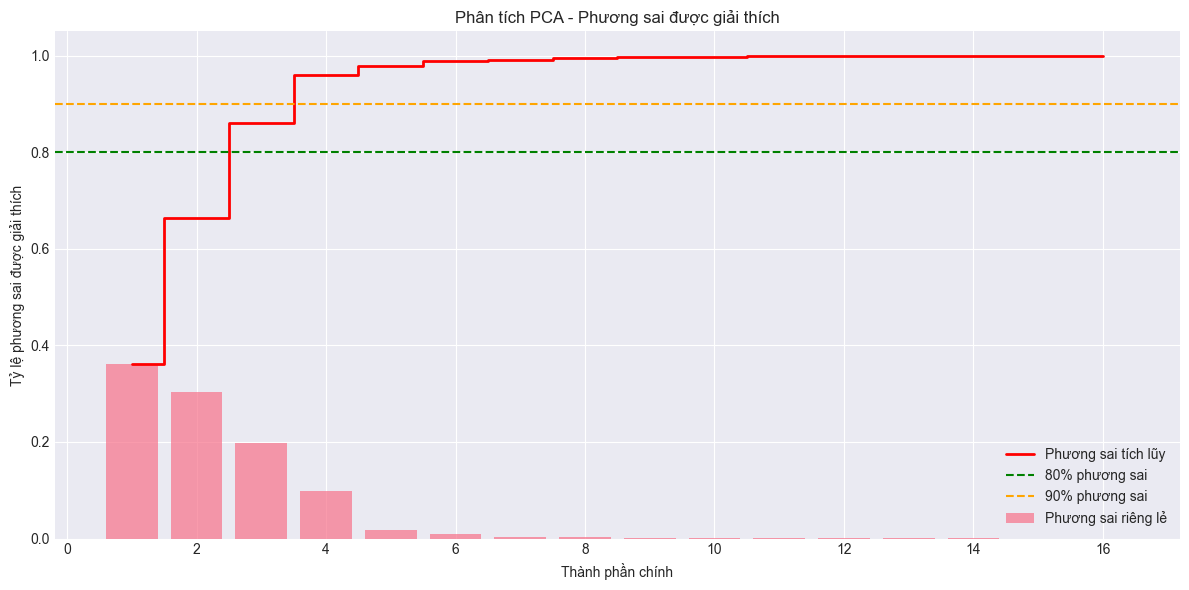


Phương sai tích lũy:
PC1-PC1: 36.08%
PC1-PC2: 66.41%
PC1-PC3: 86.12%
PC1-PC4: 95.95%
PC1-PC5: 97.76%


In [37]:
# Biểu đồ tỷ lệ phương sai được giải thích
analyzer.plot_pca_variance()

Tìm số cluster tối ưu...


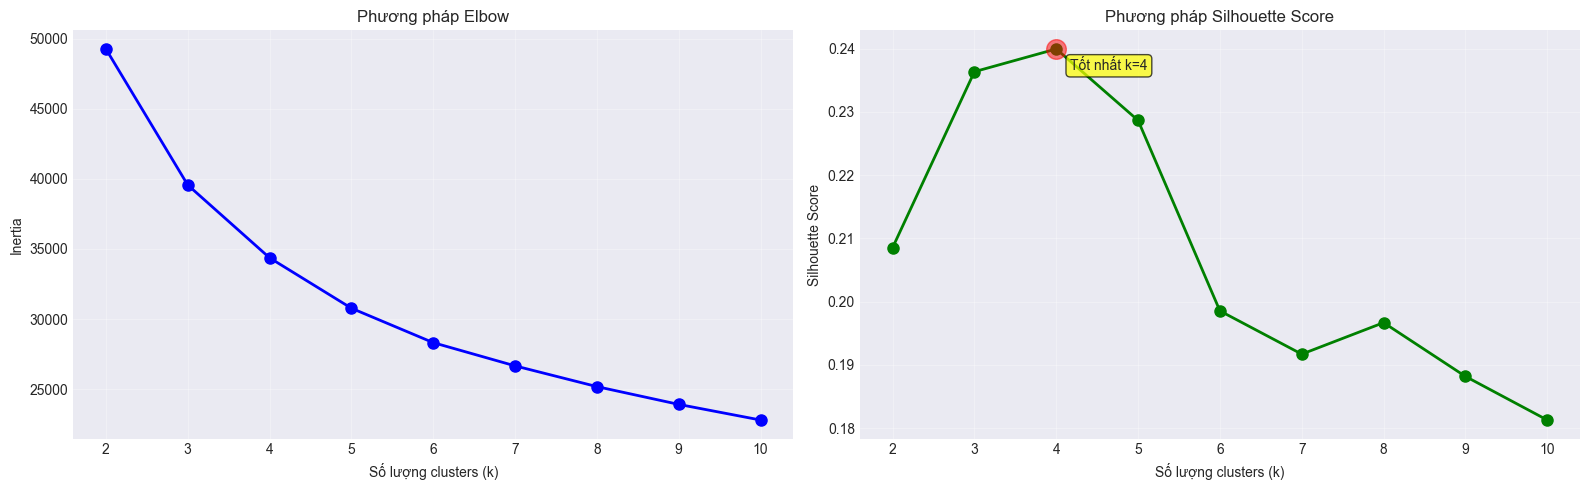

Silhouette Score đề xuất: k=4 (điểm số = 0.240)

Số cluster tối ưu được đề xuất từ Silhouette Score: k=4


In [38]:
# Xác định số cluster tối ưu bằng phương pháp Elbow và Silhouette
print("Tìm số cluster tối ưu...")
optimal_clusters = analyzer.find_optimal_clusters(k_range=range(2, 11))
analyzer.plot_optimal_clusters()

best_k = optimal_clusters['best_k_silhouette']
print(f"\nSố cluster tối ưu được đề xuất từ Silhouette Score: k={best_k}")

In [39]:
# Chạy mô hình K-means với số cluster tối ưu
print(f"Chạy K-means với {best_k} clusters...")
cluster_results = analyzer.apply_kmeans(k_values=[best_k])

# Lấy nhãn cluster
labels = analyzer.cluster_results[best_k]['labels']

# Thêm nhãn cluster vào DataFrame
df_scaled_with_clusters = df_scaled.copy()
df_scaled_with_clusters['Cluster'] = labels

df_original_with_clusters = df_original.copy()
df_original_with_clusters['Cluster'] = labels

print(f"\nPhân phối các cluster:")
print(df_scaled_with_clusters['Cluster'].value_counts().sort_index())

Chạy K-means với 4 clusters...
Kích thước clusters (k=4):
0    1096
1    1315
2     825
3     685
Name: count, dtype: int64

Phân phối các cluster:
Cluster
0    1096
1    1315
2     825
3     685
Name: count, dtype: int64


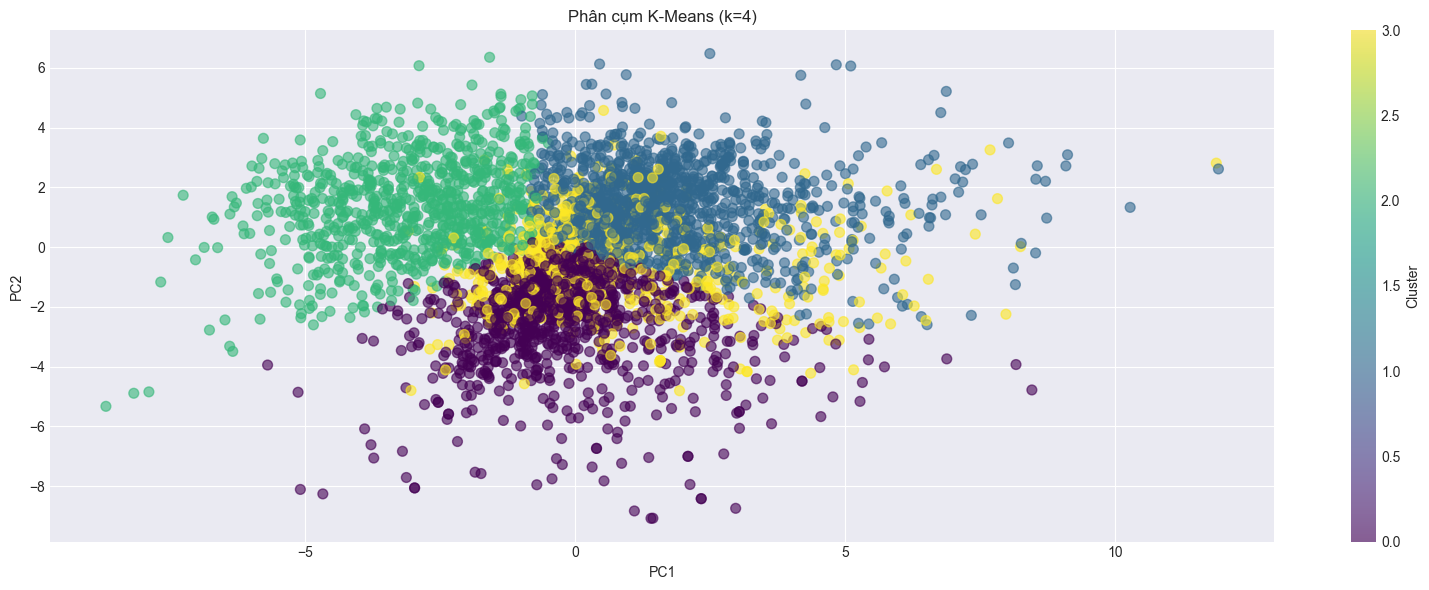


Visualization 3D:


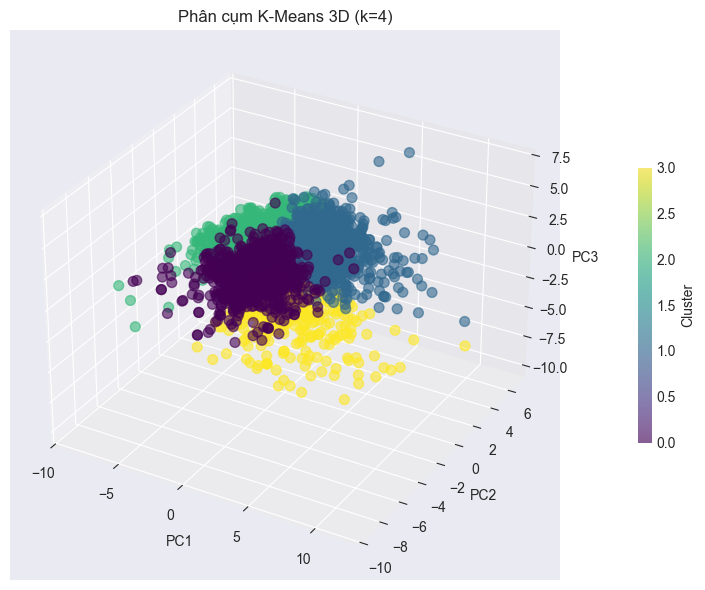

In [40]:
# Trực quan hóa kết quả phân cụm trên không gian PCA
analyzer.plot_clusters_pca(k_values=[best_k])

# Nếu có nhiều hơn 2 thành phần chính, có thể vẽ 3D
if df_pca.shape[1] >= 3:
    print("\nVisualization 3D:")
    analyzer.plot_clusters_pca_3d(k_values=[best_k])

In [41]:
# Tính các chỉ số đánh giá chất lượng phân cụm
print("ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM:")
print("-" * 40)

# Silhouette Score
sil_score = silhouette_score(df_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")

# Davies-Bouldin Index (càng nhỏ càng tốt)
db_index = davies_bouldin_score(df_scaled, labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")

# Calinski-Harabasz Index (càng lớn càng tốt)
ch_index = calinski_harabasz_score(df_scaled, labels)
print(f"Calinski-Harabasz Index: {ch_index:.3f}")

# Giải thích Silhouette Score
print("\nGIẢI THÍCH SILHOUETTE SCORE:")
if sil_score > 0.7:
    print("- Cấu trúc phân cụm mạnh (tốt)")
elif sil_score > 0.5:
    print("- Cấu trúc phân cụm hợp lý (khá)")
elif sil_score > 0.25:
    print("- Cấu trúc phân cụm yếu (trung bình)")
else:
    print("- Không có cấu trúc phân cụm rõ ràng (kém)")

ĐÁNH GIÁ CHẤT LƯỢNG PHÂN CỤM:
----------------------------------------
Silhouette Score: 0.288
Davies-Bouldin Index: 1.203
Calinski-Harabasz Index: 1243.082

GIẢI THÍCH SILHOUETTE SCORE:
- Cấu trúc phân cụm yếu (trung bình)


In [42]:
# Phân tích đặc điểm từng cluster
print("THỐNG KÊ MÔ TẢ THEO TỪNG CLUSTER:")
print("-" * 60)

# Tính mean cho từng feature theo cluster
cluster_stats = df_original_with_clusters.groupby('Cluster').mean()

# Hiển thị thống kê với định dạng tiền tệ và số
pd.set_option('display.float_format', '{:,.2f}'.format)
print(cluster_stats)

# Reset display option
pd.reset_option('display.float_format')

THỐNG KÊ MÔ TẢ THEO TỪNG CLUSTER:
------------------------------------------------------------
         Sum_Quantity  Mean_UnitPrice  Mean_TotalPrice  Sum_TotalPrice  \
Cluster                                                                  
0              169.04            9.09            49.41          448.27   
1            2,810.14            3.18            81.21        5,723.98   
2              433.40            2.63             6.15          707.23   
3              619.33            1.70           168.31          618.13   

         Count_Invoice  Count_Stock  Mean_InvoiceCountPerStock  \
Cluster                                                          
0                 1.81        16.94                       1.09   
1                 9.35       102.10                       1.56   
2                 3.07        91.92                       1.21   
3                 1.75        18.67                       1.12   

         Mean_StockCountPerInvoice  Mean_UnitPriceMeanPerInvoic

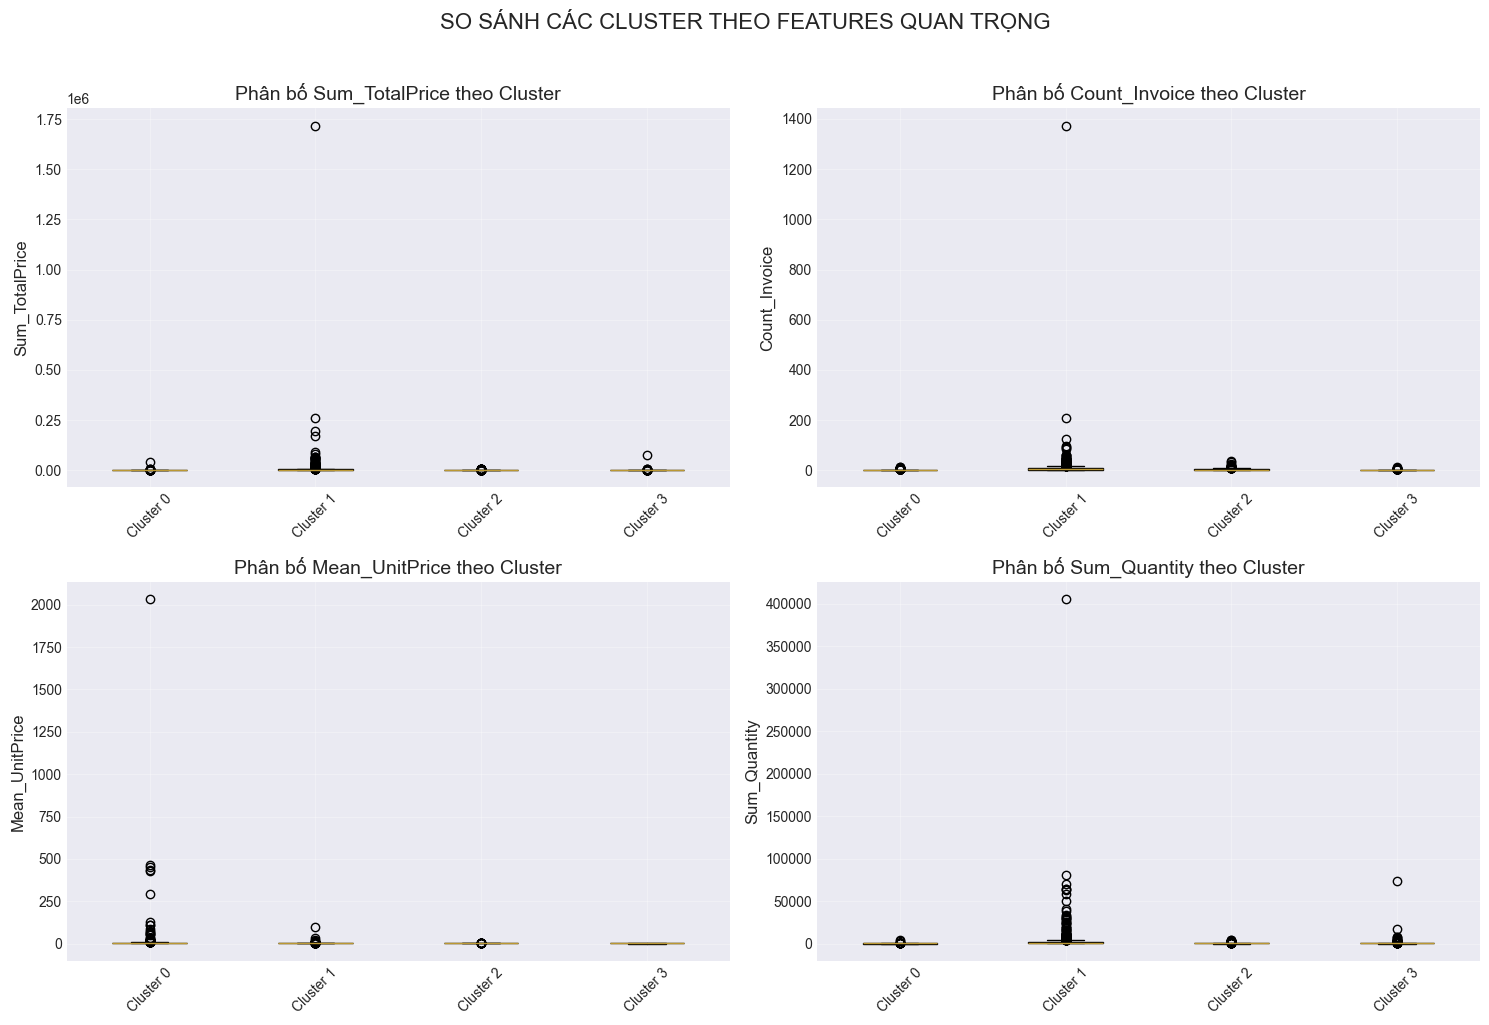

In [43]:
# Chọn các features quan trọng để so sánh
important_features = ['Sum_TotalPrice', 'Count_Invoice', 'Mean_UnitPrice', 'Sum_Quantity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(important_features):
    # Tạo boxplot cho từng feature
    data_to_plot = []
    cluster_labels_sorted = []
    
    for cluster in sorted(df_original_with_clusters['Cluster'].unique()):
        cluster_data = df_original_with_clusters[df_original_with_clusters['Cluster'] == cluster]
        if not cluster_data.empty:
            data_to_plot.append(cluster_data[feature].values)
            cluster_labels_sorted.append(f'Cluster {cluster}')
    
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True, labels=cluster_labels_sorted)
    
    # Tô màu cho boxplot
    colors = plt.cm.tab10(np.linspace(0, 1, len(data_to_plot)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'Phân bố {feature} theo Cluster', fontsize=14)
    axes[idx].set_ylabel(feature, fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('SO SÁNH CÁC CLUSTER THEO FEATURES QUAN TRỌNG', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

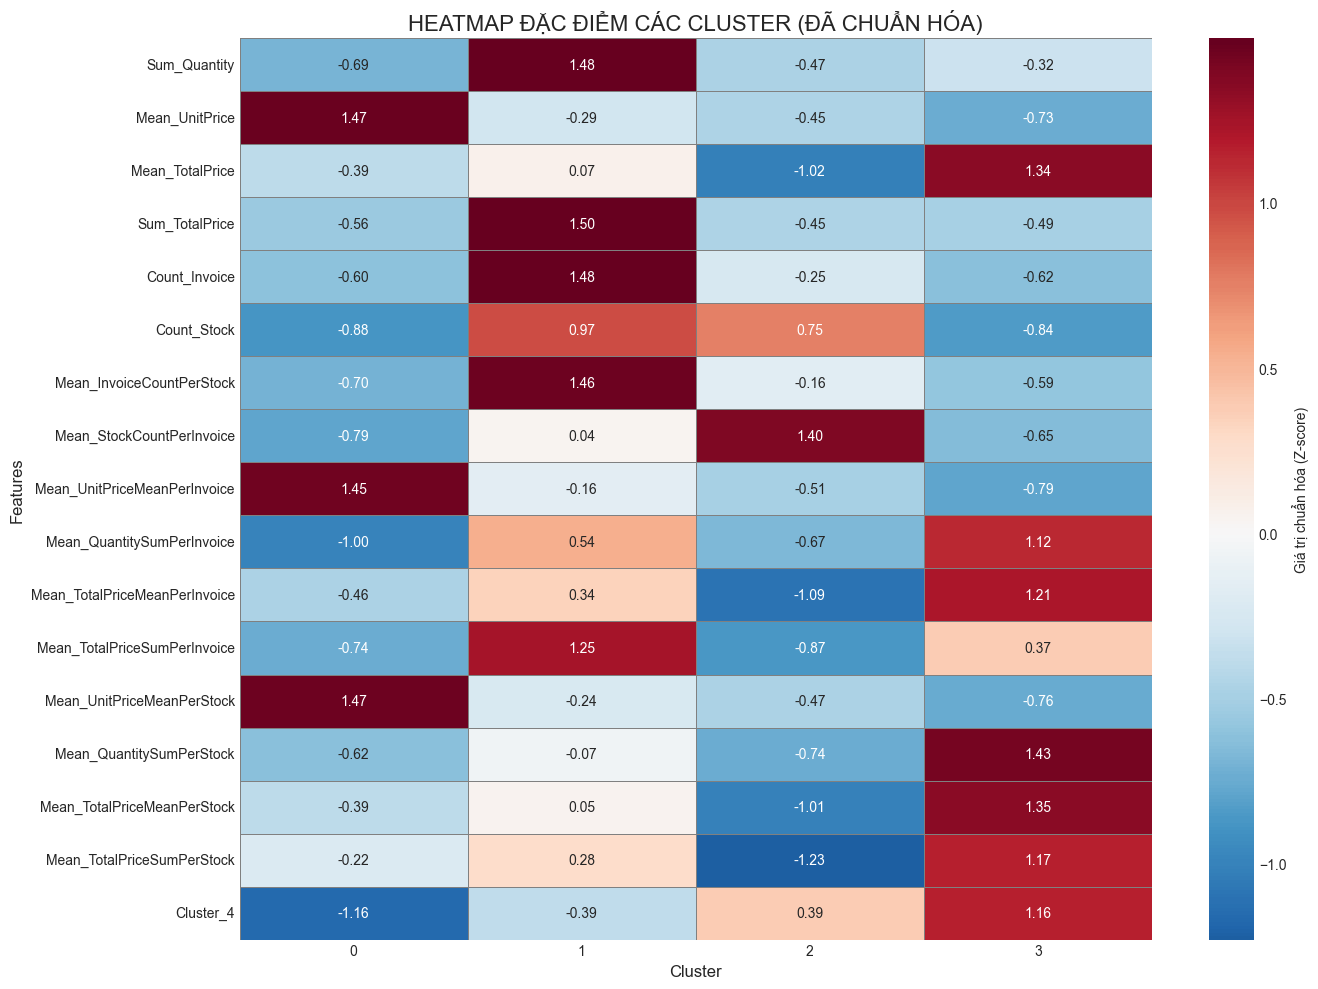

In [44]:
# Chuẩn hóa cluster_stats để vẽ heatmap
cluster_stats_normalized = (cluster_stats - cluster_stats.mean()) / cluster_stats.std()

# Vẽ heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_stats_normalized.T, 
            cmap='RdBu_r', 
            center=0,
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Giá trị chuẩn hóa (Z-score)'},
            linewidths=0.5,
            linecolor='gray')
plt.title('HEATMAP ĐẶC ĐIỂM CÁC CLUSTER (ĐÃ CHUẨN HÓA)', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

Tạo radar chart cho phân tích cluster...


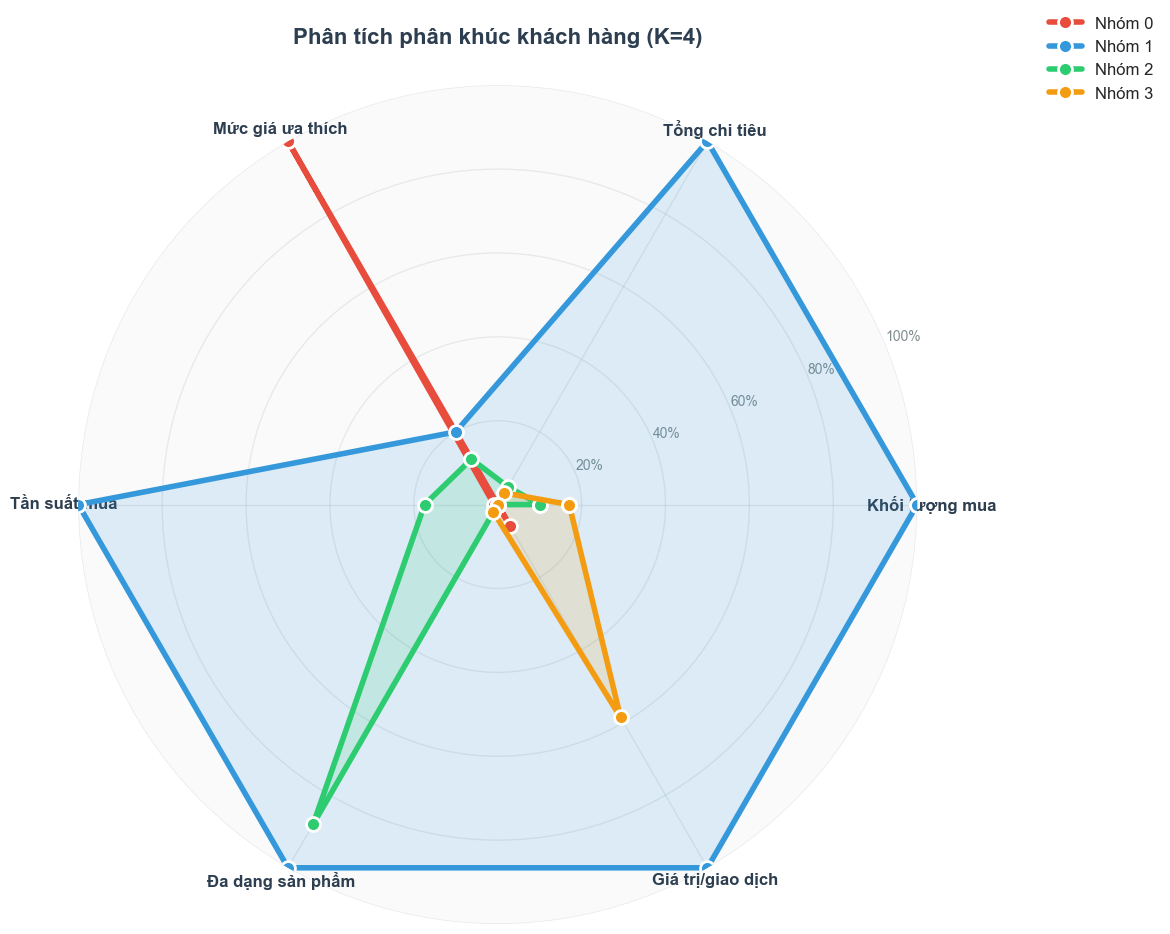

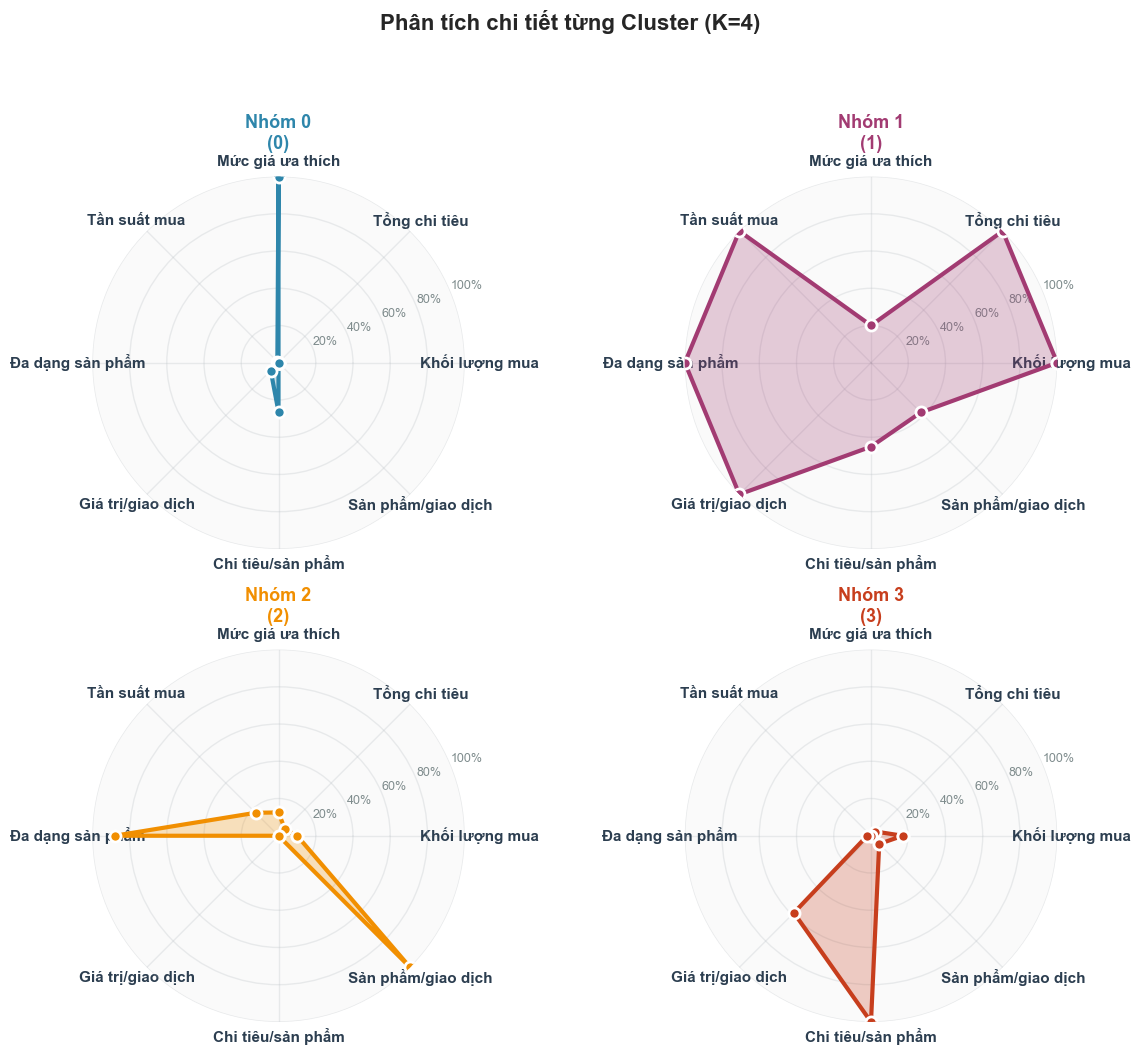

In [45]:
# Tạo radar chart chuyên nghiệp
print("Tạo radar chart cho phân tích cluster...")
analyzer.create_radar_chart(best_k)

# Tạo radar chart riêng cho từng cluster
analyzer.create_individual_radar_plots(best_k)

HUẤN LUYỆN MÔ HÌNH THAY THẾ ĐỂ GIẢI THÍCH PHÂN CỤM
------------------------------------------------------------
=== HUẤN LUYỆN MÔ HÌNH THAY THẾ (k=4) ===
Độ chính xác: 1.0000 (100.00%)

Confusion Matrix:
[[1096    0    0    0]
 [   0 1315    0    0]
 [   0    0  825    0]
 [   0    0    0  685]]

Mô hình có thể dự đoán CHÍNH XÁC các phân cụm.

TÍNH TOÁN SHAP VALUES ĐỂ GIẢI THÍCH
------------------------------------------------------------
Tính toán SHAP values cho 3,921 khách hàng...
Hoàn thành! SHAP values: 4 clusters, mỗi cluster shape: (3921, 16)

BIỂU ĐỒ TÓM TẮT SHAP:


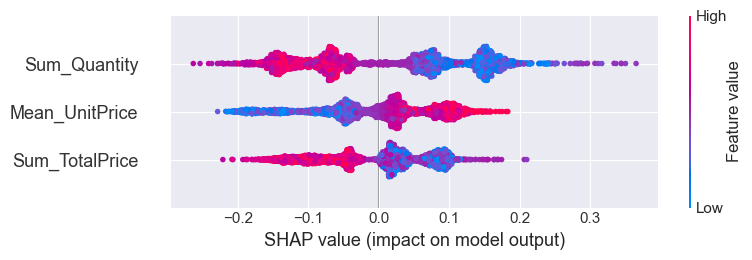

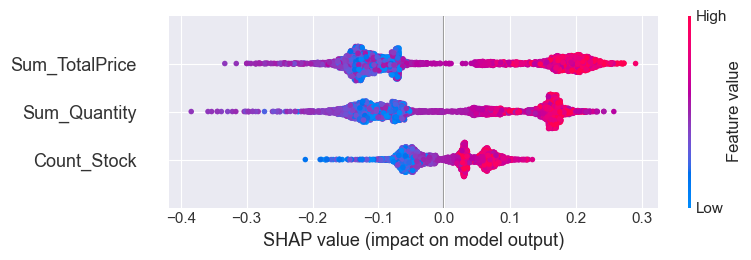

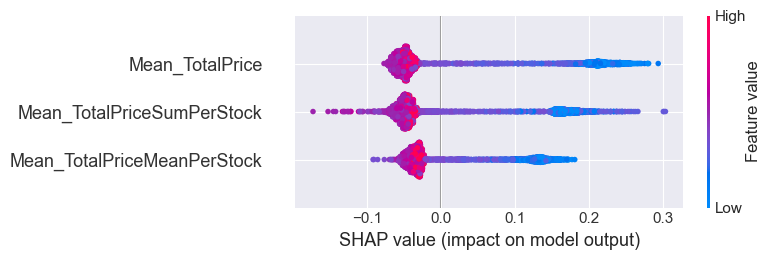

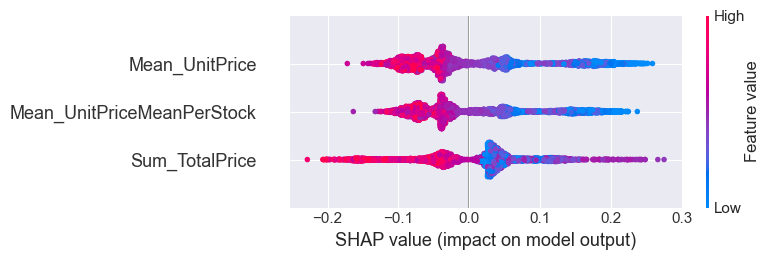

In [46]:
# Huấn luyện mô hình RandomForest để giải thích phân cụm
print("HUẤN LUYỆN MÔ HÌNH THAY THẾ ĐỂ GIẢI THÍCH PHÂN CỤM")
print("-" * 60)

surrogate_results = analyzer.train_surrogate_model(best_k)

# Tính SHAP values
print("\nTÍNH TOÁN SHAP VALUES ĐỂ GIẢI THÍCH")
print("-" * 60)

shap_results = analyzer.calculate_shap_values(best_k)

# Hiển thị SHAP summary
print("\nBIỂU ĐỒ TÓM TẮT SHAP:")
analyzer.plot_shap_summary(best_k)

In [47]:
print("=" * 100)
print("PHÂN TÍCH VÀ MÔ TẢ TỪNG CLUSTER CHI TIẾT")
print("=" * 100)

# Tính điểm Z cho từng cluster so với trung bình toàn bộ
z_scores = cluster_stats.copy()
for col in z_scores.columns:
    overall_mean = df_original[col].mean()
    overall_std = df_original[col].std()
    if overall_std > 0:  # Tránh chia cho 0
        z_scores[col] = (z_scores[col] - overall_mean) / overall_std

# Tên cluster theo phân loại marketing
cluster_names = {
    0: "KHÁCH HÀNG VIP",
    1: "KHÁCH HÀNG THƯỜNG XUYÊN",
    2: "KHÁCH HÀNG GIÁ TRỊ CAO",
    3: "KHÁCH HÀNG MỚI/ÍT HOẠT ĐỘNG",
    4: "KHÁCH HÀNG SỐ LƯỢNG LỚN"
}

# Mô tả từng cluster
for cluster in sorted(cluster_stats.index):
    print(f"\n{'='*80}")
    cluster_name = cluster_names.get(cluster, f"CLUSTER {cluster}")
    print(f"{cluster_name}")
    print(f"{'='*80}")
    
    count = len(df_original_with_clusters[df_original_with_clusters['Cluster'] == cluster])
    percentage = (count / len(df_original_with_clusters)) * 100
    print(f"Số lượng: {count} khách hàng ({percentage:.1f}%)")
    
    # Lấy các features có Z-score cao nhất (trên 0.5)
    high_features = z_scores.loc[cluster][z_scores.loc[cluster].abs() > 0.5].sort_values(ascending=False)
    
    print("\nĐẶC ĐIỂM NỔI BẬT (Z-score > 0.5):")
    for feature, z_score in high_features.items():
        direction = "CAO HƠN" if z_score > 0 else "THẤP HƠN"
        magnitude = abs(z_score)
        feature_vn = ClusterAnalyzer.FEATURE_NAMES_VN.get(feature, feature)
        
        if magnitude > 1.5:
            level = "RẤT CAO" if z_score > 0 else "RẤT THẤP"
        elif magnitude > 0.8:
            level = "CAO" if z_score > 0 else "THẤP"
        else:
            level = "HƠI CAO" if z_score > 0 else "HƠI THẤP"
            
        print(f"  ✓ {feature_vn}: {level} (Z = {z_score:.2f})")
    
    # Đề xuất chiến lược
    print("\nĐỀ XUẤT CHIẾN LƯỢC MARKETING:")
    
    # Kiểm tra từng loại feature để đề xuất
    if 'Sum_TotalPrice' in high_features and high_features['Sum_TotalPrice'] > 0.5:
        print("  • Ưu tiên chăm sóc đặc biệt - khách hàng giá trị cao")
        print("  • Gói dịch vụ premium, ưu đãi riêng")
    
    if 'Count_Invoice' in high_features and high_features['Count_Invoice'] > 0.5:
        print("  • Chương trình khách hàng thân thiết")
        print("  • Ưu đãi cho mua hàng thường xuyên")
    
    if 'Mean_UnitPrice' in high_features and high_features['Mean_UnitPrice'] > 0.5:
        print("  • Cross-selling sản phẩm cao cấp")
        print("  • Giới thiệu sản phẩm mới cao cấp")
    
    if 'Sum_Quantity' in high_features and high_features['Sum_Quantity'] > 0.5:
        print("  • Ưu đãi theo volume (mua càng nhiều càng rẻ)")
        print("  • Gói combo, mua số lượng lớn")
    
    if any(z_scores.loc[cluster] < -0.5):
        negative_features = z_scores.loc[cluster][z_scores.loc[cluster] < -0.5]
        if len(negative_features) > 3:
            print("  • Chiến dịch reactivation (kích hoạt lại khách hàng)")
            print("  • Ưu đãi đặc biệt để thu hút quay lại")
    
    print(f"\nKHUYẾN NGHỊ CHÍNH:")
    if cluster == 0:  # VIP
        print("  - Personal shopper, dịch vụ 24/7")
        print("  - Quà tặng cao cấp, event đặc biệt")
    elif cluster == 1:  # Thường xuyên
        print("  - Chương trình tích điểm")
        print("  - Ưu đãi sinh nhật, kỷ niệm")
    elif cluster == 2:  # Giá trị cao
        print("  - Bundle sản phẩm cao cấp")
        print("  - Early access sản phẩm mới")
    elif cluster == 3:  # Mới/Ít hoạt động
        print("  - Email marketing welcome series")
        print("  - Ưu đãi first purchase")
    elif cluster == 4:  # Số lượng lớn
        print("  - Discount theo volume")
        print("  - Free shipping threshold")

PHÂN TÍCH VÀ MÔ TẢ TỪNG CLUSTER CHI TIẾT

KHÁCH HÀNG VIP
Số lượng: 1096 khách hàng (28.0%)

ĐẶC ĐIỂM NỔI BẬT (Z-score > 0.5):
  ✓ Sản phẩm/giao dịch: HƠI THẤP (Z = -0.53)
  ✓ Cluster_4: THẤP (Z = -1.21)

ĐỀ XUẤT CHIẾN LƯỢC MARKETING:

KHUYẾN NGHỊ CHÍNH:
  - Personal shopper, dịch vụ 24/7
  - Quà tặng cao cấp, event đặc biệt

KHÁCH HÀNG THƯỜNG XUYÊN
Số lượng: 1315 khách hàng (33.5%)

ĐẶC ĐIỂM NỔI BẬT (Z-score > 0.5):

ĐỀ XUẤT CHIẾN LƯỢC MARKETING:

KHUYẾN NGHỊ CHÍNH:
  - Chương trình tích điểm
  - Ưu đãi sinh nhật, kỷ niệm

KHÁCH HÀNG GIÁ TRỊ CAO
Số lượng: 825 khách hàng (21.0%)

ĐẶC ĐIỂM NỔI BẬT (Z-score > 0.5):
  ✓ Sản phẩm/giao dịch: CAO (Z = 1.00)
  ✓ Cluster_4: HƠI CAO (Z = 0.68)

ĐỀ XUẤT CHIẾN LƯỢC MARKETING:

KHUYẾN NGHỊ CHÍNH:
  - Bundle sản phẩm cao cấp
  - Early access sản phẩm mới

KHÁCH HÀNG MỚI/ÍT HOẠT ĐỘNG
Số lượng: 685 khách hàng (17.5%)

ĐẶC ĐIỂM NỔI BẬT (Z-score > 0.5):
  ✓ Cluster_4: RẤT CAO (Z = 1.63)

ĐỀ XUẤT CHIẾN LƯỢC MARKETING:

KHUYẾN NGHỊ CHÍNH:
  - Email market

In [48]:
# Lưu kết quả phân cụm
print("LƯU KẾT QUẢ PHÂN CỤM")
print("-" * 50)

output_path = '../result/Kmeans/customers_with_clusters.csv'
df_original_with_clusters.to_csv(output_path, index=True)
print(f"✓ Đã lưu kết quả phân cụm vào: {output_path}")
print(f"  Tổng số dòng: {len(df_original_with_clusters)}")

# Lưu thống kê cluster
stats_output_path = '../result/Kmeans/cluster_statistics.csv'
cluster_stats.to_csv(stats_output_path)
print(f"✓ Đã lưu thống kê cluster vào: {stats_output_path}")

# Lưu cluster assignments từ analyzer
analyzer.save_clusters()

# Lưu SHAP values nếu có
if best_k in analyzer.shap_results:
    shap_values = analyzer.shap_results[best_k]['shap_values']
    shap_output_path = '../result/Kmeans/shap_values.npy'
    np.save(shap_output_path, shap_values)
    print(f"✓ Đã lưu SHAP values vào: {shap_output_path}")

LƯU KẾT QUẢ PHÂN CỤM
--------------------------------------------------
✓ Đã lưu kết quả phân cụm vào: ../result/Kmeans/customers_with_clusters.csv
  Tổng số dòng: 3921
✓ Đã lưu thống kê cluster vào: ../result/Kmeans/cluster_statistics.csv
Đã lưu kết quả phân cụm k=4: ../data/processed/customer_clusters_k4.csv
✓ Đã lưu SHAP values vào: ../result/Kmeans/shap_values.npy


In [ ]:
# Tạo báo cáo tổng hợp
print("=" * 100)
print("BÁO CÁO TỔNG HỢP PHÂN CỤM KHÁCH HÀNG")
print("=" * 100)

print(f"\n1. THÔNG TIN TỔNG QUAN:")
print(f"   • Tổng số khách hàng: {len(df_original_with_clusters):,}")
print(f"   • Số cluster tối ưu: {best_k}")
print(f"   • Số features sử dụng: {len(df_scaled.columns)}")
print(f"   • Phương sai PCA được giải thích: {analyzer.pca.explained_variance_ratio_[:3].sum()*100:.1f}% (3 PC đầu)")

print(f"\n2. CHẤT LƯỢNG PHÂN CỤM:")
print(f"   • Silhouette Score: {sil_score:.3f}")
if sil_score > 0.5:
    print(f"     → Phân cụm có cấu trúc tốt")
else:
    print(f"     → Cần xem xét lại số lượng cluster")
print(f"   • Davies-Bouldin Index: {db_index:.3f}")
print(f"   • Calinski-Harabasz Index: {ch_index:.3f}")

print(f"\n👥 3. PHÂN PHỐI KHÁCH HÀNG THEO CLUSTER:")
total_customers = len(df_original_with_clusters)
for cluster in sorted(df_original_with_clusters['Cluster'].unique()):
    count = len(df_original_with_clusters[df_original_with_clusters['Cluster'] == cluster])
    percentage = (count / total_customers) * 100
    cluster_name = cluster_names.get(cluster, f"Cluster {cluster}")
    print(f"   • {cluster_name}: {count:,} khách ({percentage:.1f}%)")

print(f"\n4. KHUYẾN NGHỊ CHIẾN LƯỢC:")
print(f"   • Cluster 0 (VIP): Đầu tư chăm sóc cá nhân hóa cao")
print(f"   • Cluster 1 (Thường xuyên): Duy trì quan hệ, tăng tần suất mua")
print(f"   • Cluster 2 (Giá trị cao): Upsell sản phẩm cao cấp")
print(f"   • Cluster 3 (Mới/Ít hoạt động): Chiến dịch reactivation")
print(f"   • Cluster 4 (Số lượng lớn): Tối ưu chi phí vận chuyển")

print(f"\n5. DỮ LIỆU ĐÃ LƯU:")
print(f"   • Customers with clusters: {output_path}")
print(f"   • Cluster statistics: {stats_output_path}")
print(f"   • Cluster assignments: ../result/Kmeans/customer_clusters_k{best_k}.csv")
if best_k in analyzer.shap_results:
    print(f"   • SHAP values: ../result/Kmeans/shap_values.npy")

print(f"\nKẾT LUẬN:")
print(f"Phân cụm đã xác định được {best_k} nhóm khách hàng rõ ràng với chất lượng tốt.")
print(f"Có thể sử dụng kết quả này để tối ưu hóa chiến lược marketing và chăm sóc khách hàng.")

BÁO CÁO TỔNG HỢP PHÂN CỤM KHÁCH HÀNG

1. THÔNG TIN TỔNG QUAN:
   • Tổng số khách hàng: 3,921
   • Số cluster tối ưu: 4
   • Số features sử dụng: 17
   • Phương sai PCA được giải thích: 86.1% (3 PC đầu)

2. CHẤT LƯỢNG PHÂN CỤM:
   • Silhouette Score: 0.288
     → Cần xem xét lại số lượng cluster
   • Davies-Bouldin Index: 1.203
   • Calinski-Harabasz Index: 1243.082

👥 3. PHÂN PHỐI KHÁCH HÀNG THEO CLUSTER:
   • KHÁCH HÀNG VIP: 1,096 khách (28.0%)
   • KHÁCH HÀNG THƯỜNG XUYÊN: 1,315 khách (33.5%)
   • KHÁCH HÀNG GIÁ TRỊ CAO: 825 khách (21.0%)
   • KHÁCH HÀNG MỚI/ÍT HOẠT ĐỘNG: 685 khách (17.5%)

4. KHUYẾN NGHỊ CHIẾN LƯỢC:
   • Cluster 0 (VIP): Đầu tư chăm sóc cá nhân hóa cao
   • Cluster 1 (Thường xuyên): Duy trì quan hệ, tăng tần suất mua
   • Cluster 2 (Giá trị cao): Upsell sản phẩm cao cấp
   • Cluster 3 (Mới/Ít hoạt động): Chiến dịch reactivation
   • Cluster 4 (Số lượng lớn): Tối ưu chi phí vận chuyển

5. DỮ LIỆU ĐÃ LƯU:
   • Customers with clusters: ../result/Kmeans/customers_with_c

In [50]:
# Hiển thị ví dụ khách hàng từ mỗi cluster
print("VÍ DỤ KHÁCH HÀNG TỪ MỖI CLUSTER")
print("-" * 50)

# Chọn features để hiển thị
display_features = ['Sum_TotalPrice', 'Count_Invoice', 'Mean_UnitPrice', 'Sum_Quantity', 'Count_Stock']

for cluster in sorted(df_original_with_clusters['Cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"{cluster_names.get(cluster, f'CLUSTER {cluster}')}:")
    print(f"{'='*60}")
    
    # Lấy 3 khách hàng đầu tiên của cluster
    cluster_samples = df_original_with_clusters[df_original_with_clusters['Cluster'] == cluster].head(3)
    
    for idx, (customer_id, row) in enumerate(cluster_samples.iterrows()):
        print(f"\nKhách hàng {idx+1}: {customer_id}")
        for feature in display_features:
            feature_vn = ClusterAnalyzer.FEATURE_NAMES_VN.get(feature, feature)
            value = row[feature]
            
            # Định dạng hiển thị
            if feature in ['Sum_TotalPrice', 'Mean_UnitPrice']:
                display_value = f"£{value:,.2f}"
            else:
                display_value = f"{value:,.0f}"
            
            print(f"  {feature_vn}: {display_value}")

VÍ DỤ KHÁCH HÀNG TỪ MỖI CLUSTER
--------------------------------------------------

KHÁCH HÀNG VIP:

Khách hàng 1: 012821
  Tổng chi tiêu: £92.72
  Số lần mua: 1
  Giá trung bình: £2.50
  Tổng số lượng mua: 70
  Số sản phẩm khác nhau: 6

Khách hàng 2: 012823
  Tổng chi tiêu: £1,759.50
  Số lần mua: 5
  Giá trung bình: £7.65
  Tổng số lượng mua: 230
  Số sản phẩm khác nhau: 1

Khách hàng 3: 012827
  Tổng chi tiêu: £430.15
  Số lần mua: 3
  Giá trung bình: £2.87
  Tổng số lượng mua: 197
  Số sản phẩm khác nhau: 19

KHÁCH HÀNG THƯỜNG XUYÊN:

Khách hàng 1: 000nan
  Tổng chi tiêu: £1,716,830.53
  Số lần mua: 1,373
  Giá trung bình: £6.25
  Tổng số lượng mua: 405,650
  Số sản phẩm khác nhau: 3,401

Khách hàng 2: 012747
  Tổng chi tiêu: £4,196.01
  Số lần mua: 11
  Giá trung bình: £4.37
  Tổng số lượng mua: 1,275
  Số sản phẩm khác nhau: 42

Khách hàng 3: 012748
  Tổng chi tiêu: £33,719.73
  Số lần mua: 209
  Giá trung bình: £2.66
  Tổng số lượng mua: 25,747
  Số sản phẩm khác nhau: 1,768

KH

In [51]:
# Hiển thị ví dụ khách hàng từ mỗi cluster
print("VÍ DỤ KHÁCH HÀNG TỪ MỖI CLUSTER")
print("-" * 50)

# Chọn features để hiển thị
display_features = ['Sum_TotalPrice', 'Count_Invoice', 'Mean_UnitPrice', 'Sum_Quantity', 'Count_Stock']

for cluster in sorted(df_original_with_clusters['Cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"{cluster_names.get(cluster, f'CLUSTER {cluster}')}:")
    print(f"{'='*60}")
    
    # Lấy 3 khách hàng đầu tiên của cluster
    cluster_samples = df_original_with_clusters[df_original_with_clusters['Cluster'] == cluster].head(3)
    
    for idx, (customer_id, row) in enumerate(cluster_samples.iterrows()):
        print(f"\nKhách hàng {idx+1}: {customer_id}")
        for feature in display_features:
            feature_vn = ClusterAnalyzer.FEATURE_NAMES_VN.get(feature, feature)
            value = row[feature]
            
            # Định dạng hiển thị
            if feature in ['Sum_TotalPrice', 'Mean_UnitPrice']:
                display_value = f"£{value:,.2f}"
            else:
                display_value = f"{value:,.0f}"
            
            print(f"  {feature_vn}: {display_value}")

VÍ DỤ KHÁCH HÀNG TỪ MỖI CLUSTER
--------------------------------------------------

KHÁCH HÀNG VIP:

Khách hàng 1: 012821
  Tổng chi tiêu: £92.72
  Số lần mua: 1
  Giá trung bình: £2.50
  Tổng số lượng mua: 70
  Số sản phẩm khác nhau: 6

Khách hàng 2: 012823
  Tổng chi tiêu: £1,759.50
  Số lần mua: 5
  Giá trung bình: £7.65
  Tổng số lượng mua: 230
  Số sản phẩm khác nhau: 1

Khách hàng 3: 012827
  Tổng chi tiêu: £430.15
  Số lần mua: 3
  Giá trung bình: £2.87
  Tổng số lượng mua: 197
  Số sản phẩm khác nhau: 19

KHÁCH HÀNG THƯỜNG XUYÊN:

Khách hàng 1: 000nan
  Tổng chi tiêu: £1,716,830.53
  Số lần mua: 1,373
  Giá trung bình: £6.25
  Tổng số lượng mua: 405,650
  Số sản phẩm khác nhau: 3,401

Khách hàng 2: 012747
  Tổng chi tiêu: £4,196.01
  Số lần mua: 11
  Giá trung bình: £4.37
  Tổng số lượng mua: 1,275
  Số sản phẩm khác nhau: 42

Khách hàng 3: 012748
  Tổng chi tiêu: £33,719.73
  Số lần mua: 209
  Giá trung bình: £2.66
  Tổng số lượng mua: 25,747
  Số sản phẩm khác nhau: 1,768

KH

In [52]:
# Tạo thư mục lưu biểu đồ
import os
os.makedirs('../result/Kmeans/reports/figures', exist_ok=True)

print("LƯU BIỂU ĐỒ QUAN TRỌNG")
print("-" * 40)

# 1. Lưu biểu đồ phân tán PCA
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], 
                     c=labels, cmap='tab10', alpha=0.7, s=50)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Phân cụm khách hàng trên không gian PCA', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('../reports/figures/cluster_pca_scatter.png', dpi=300, bbox_inches='tight')
print("✓ Đã lưu biểu đồ phân tán PCA")

# 2. Lưu biểu đồ boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
important_features = ['Sum_TotalPrice', 'Count_Invoice', 'Mean_UnitPrice', 'Sum_Quantity']
axes = axes.flatten()

for idx, feature in enumerate(important_features):
    data = [df_original_with_clusters[df_original_with_clusters['Cluster'] == c][feature] 
            for c in sorted(df_original_with_clusters['Cluster'].unique())]
    
    bp = axes[idx].boxplot(data, patch_artist=True, 
                          labels=[f'Cluster {c}' for c in sorted(df_original_with_clusters['Cluster'].unique())])
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(data)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[idx].set_title(f'Phân bố {feature}', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Phân bố các Features quan trọng theo Cluster', fontsize=14)
plt.tight_layout()
plt.savefig('../reports/figures/cluster_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Đã lưu biểu đồ boxplot")

# 3. Lưu heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_stats_normalized.T, 
            cmap='RdBu_r', 
            center=0,
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Z-score'},
            linewidths=0.5)
plt.title('Heatmap đặc điểm các Cluster', fontsize=14)
plt.tight_layout()
plt.savefig('../reports/figures/cluster_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Đã lưu biểu đồ heatmap")

plt.close('all')

LƯU BIỂU ĐỒ QUAN TRỌNG
----------------------------------------
✓ Đã lưu biểu đồ phân tán PCA
✓ Đã lưu biểu đồ boxplot
✓ Đã lưu biểu đồ heatmap
